<a href="https://colab.research.google.com/github/pratyushmishra5/codes/blob/main/Copy_of_data_preprocessing_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Template

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
df = pd.read_csv('AEP_hourly.csv')


In [ ]:
print(df.head())
print(df.info())

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None


Parsing Datetime


In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')  # make datetime the index
df = df.sort_index()


Handling Missing Data

In [ ]:

print(df.isnull().sum())
df = df.groupby(df.index).mean()
all_hours = pd.date_range(start=df.index.min(), end=df.index.max(), freq="h")
df = df.reindex(all_hours)
df['AEP_MW'] = df['AEP_MW'].interpolate(method='time')



AEP_MW    0
dtype: int64


Feature Engineering

In [ ]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)


Creating Lag Features

In [ ]:
df['lag_1'] = df['AEP_MW'].shift(1)
df['lag_24'] = df['AEP_MW'].shift(24)
df['lag_168'] = df['AEP_MW'].shift(168)


Creating Rolling Features

In [ ]:
df['rolling_mean_24'] = df['AEP_MW'].shift(1).rolling(window=24).mean()
df['rolling_std_24'] = df['AEP_MW'].shift(1).rolling(window=24).std()
print(df['rolling_mean_24'])

2004-10-01 01:00:00             NaN
2004-10-01 02:00:00             NaN
2004-10-01 03:00:00             NaN
2004-10-01 04:00:00             NaN
2004-10-01 05:00:00             NaN
                           ...     
2018-08-02 20:00:00    15543.958333
2018-08-02 21:00:00    15589.541667
2018-08-02 22:00:00    15624.791667
2018-08-02 23:00:00    15658.291667
2018-08-03 00:00:00    15687.666667
Freq: h, Name: rolling_mean_24, Length: 121296, dtype: float64


Remove NaN

In [ ]:
df = df.dropna()


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('AEP_MW', axis=1)
y = df['AEP_MW']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

Training Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 482.64
MAE: 379.59
R²: 0.96


Predicting Test Results

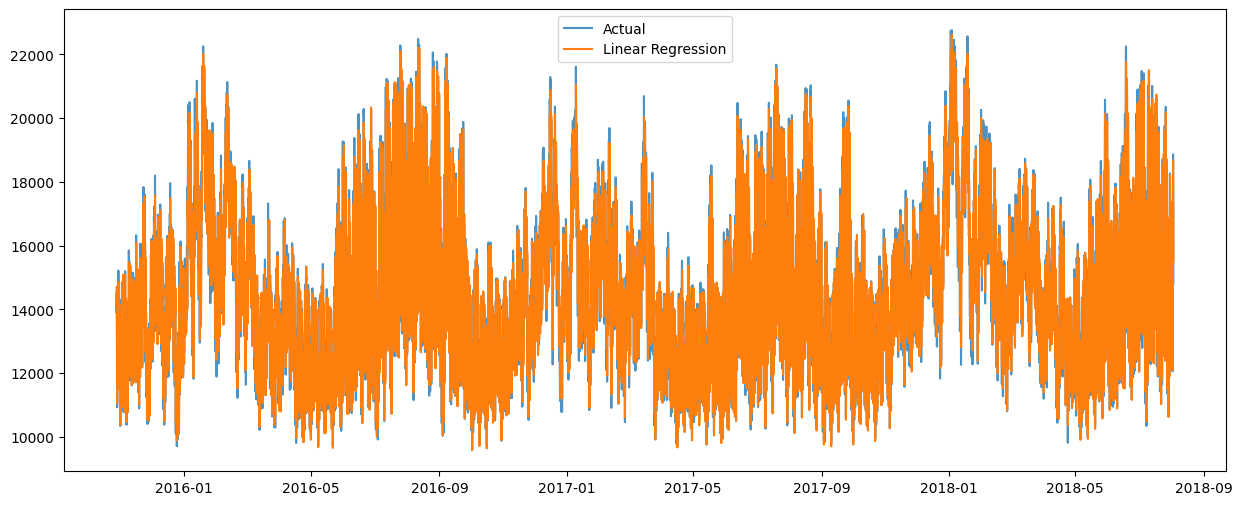

In [ ]:

plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test, label="Actual", alpha=0.8)
#plt.xlabel()
plt.plot(y_test.index, y_pred, label="Linear Regression")
plt.legend()
plt.show()


Trying Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("RMSE (RF):", np.sqrt(mean_squared_error(y_test, rf_pred)))


RMSE (RF): 186.33188787035556


Predict the accuracy via r2_score

In [ ]:
r2 = r2_score(y_test, rf_pred)
print("R² score:", r2)

R² score: 0.9941929527041158


Predicting The Random Forest Regressor

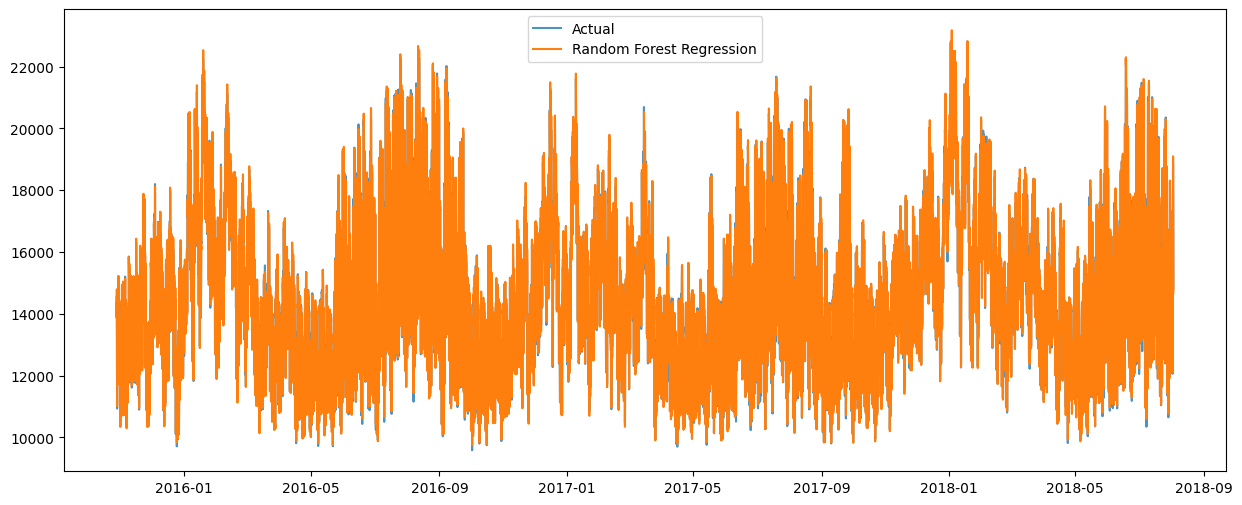

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test, label="Actual", alpha=0.8)
plt.plot(y_test.index, rf_pred, label="Random Forest Regression")
plt.legend()
plt.show()

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


Predicting Ridge Regressor Results

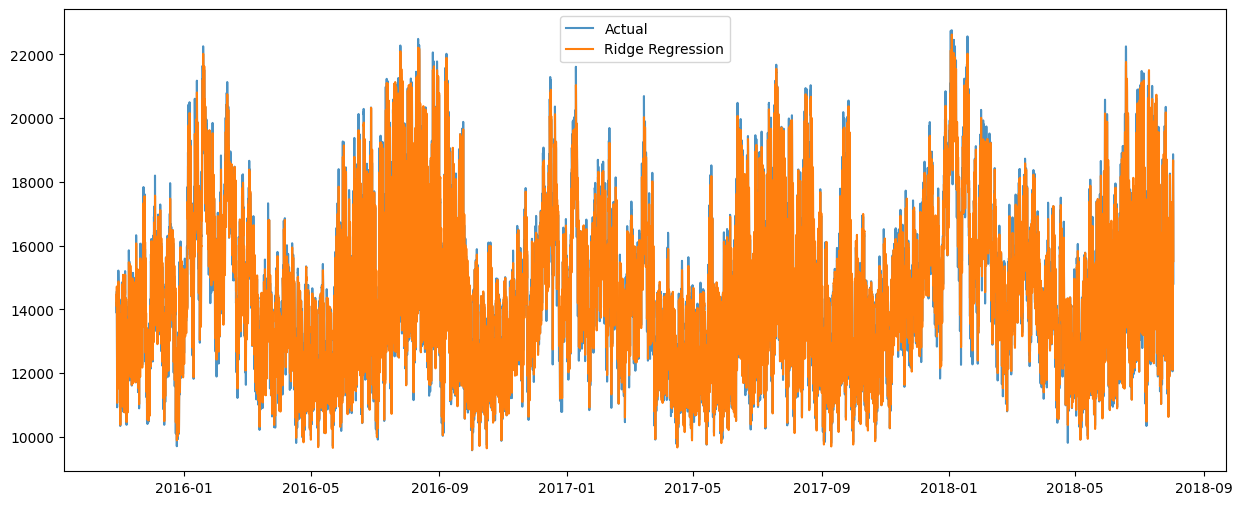

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test, label="Actual", alpha=0.8)
plt.plot(y_test.index, y_pred_ridge, label="Ridge Regression")
plt.legend()
plt.show()

r2_score

In [ ]:
r2 = r2_score(y_test, y_pred_ridge)
print("R² score:", r2)

R² score: 0.9610384501194525


Joblib

In [ ]:
import cloudpickle
with open("random_forest_model.pkl", "wb") as f:
    cloudpickle.dump(rf, f)
with open("linear_regression_model.pkl", "wb") as f:
    cloudpickle.dump(lr, f)
with open("ridge_regression.pkl", "wb") as f:
    cloudpickle.dump(ridge_model, f)

Download

In [ ]:
from google.colab import files

files.download("random_forest_model.pkl")
files.download("linear_regression_model.pkl")
files.download("ridge_regression.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>